# **[Coursera]** Applied Social Network Analysis in Python

## Chapter 1-3. Nodes and Edge Attributes
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/node-and-edge-attributes-hTKct)**

<hr>

### Nodes and Edge Attributes for **Undirected Network**

what we're going to do in this lecture is we're going to learn how to access this information once we've loaded it up.<br>
So, let's say you have a network that you constructed on Python and the edges have attributes, how do we access these attributes?

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Let's make our own network! (the below graph is configured same as lecture show)

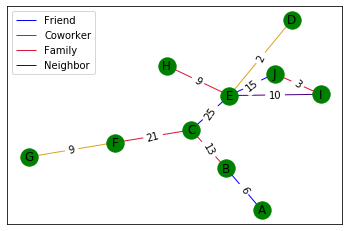

In [2]:
# Define of Graph Class
G = nx.Graph()

# make connections with its own relationship and weight.
# (node1, node2, weight, relationship)
connection_weight_relation_list = [('B', 'A', 6, 'Friend'), 
                                   ('B', 'C', 13, 'Coworker'), 
                                   ('C', 'F', 21, 'Coworker'), 
                                   ('C', 'E', 25, 'Friend'), 
                                   ('E', 'D', 2, 'Family'), 
                                   ('G', 'F', 9, 'Family'), 
                                   ('E', 'I', 10, 'Neighbor'), 
                                   ('E', 'J', 15, 'Friend'), 
                                   ('I', 'J', 3, 'Coworker'), 
                                   ('E', 'H', 9, 'Coworker')]
# Define Relationship color
relationship_color = {'Friend':'blue', 'Coworker':'crimson', 'Family':'goldenrod', 'Neighbor':'indigo'}


# Add edges with its relationship.
for n1, n2, w, r in connection_weight_relation_list:
    G.add_edge(n1, n2, relation=r, weight=w)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# add a weight for each edges.
weight_info = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight_info)

# coloring differently by its own relationship
for nodes, relation in nx.get_edge_attributes(G, 'relation').items():
    color = relationship_color[relation] # Get relationship color
    nx.draw_networkx_edges(G, pos, edgelist=[nodes], edge_color = color) # draw edges with given color

# annotate relationship colors
plt.legend(relationship_color)        

# add nodes with its labels
nx.draw_networkx_nodes(G,pos, node_color='green')
nx.draw_networkx_labels(G,pos)

plt.show()

You can get all possible connection of nodes from Graph "G" using `.edges()`.
```python
all_edges = G.edges()
print(f'List of all edges : {all_edges}')
```
> <b>output</b><br>
> List of all edges : [('B', 'A'), ('B', 'C'), ('C', 'F'), ('C', 'E'), ('F', 'G'), ('E', 'D'), ('E', 'I'), ('E', 'J'), ('E', 'H'), ('I', 'J')]

<br>

You can get all possible connection of nodes and what data they have (Attributs) from Graph using `.edges(data=True)`.
```python
all_edges_with_data = G.edges(data=True)
print(f'List of all edges with attributes : {all_edges_with_data}')
```
> <b>output</b><br>
> List of all edges with attributes : [('B', 'A', {'relation': 'Friend', 'weight': 6}), ('B', 'C', {'relation': 'Coworker', 'weight': 13}), ('C', 'F', {'relation': 'Coworker', 'weight': 21}), ('C', 'E', {'relation': 'Friend', 'weight': 25}), ('F', 'G', {'relation': 'Family', 'weight': 9}), ('E', 'D', {'relation': 'Family', 'weight': 2}), ('E', 'I', {'relation': 'Neighbor', 'weight': 10}), ('E', 'J', {'relation': 'Friend', 'weight': 15}), ('E', 'H', {'relation': 'Coworker', 'weight': 9}), ('I', 'J', {'relation': 'Coworker', 'weight': 3})]

<br>
You can get all possible connection of nodes and data you want ('relationship' or 'weigth') from Graph using `.edges(data='relation')`.

```python
all_edges_with_data = G.edges(data='relation')
print(f'List of all edges with relation : {all_edges_with_data}')
```
> <b>output</b><br>
> List of all edges with relation : [('B', 'A', 'Friend'), ('B', 'C', 'Coworker'), ('C', 'F', 'Coworker'), ('C', 'E', 'Friend'), ('F', 'G', 'Family'), ('E', 'D', 'Family'), ('E', 'I', 'Neighbor'), ('E', 'J', 'Friend'), ('E', 'H', 'Coworker'), ('I', 'J', 'Coworker')]

Also you can get A EDGE information directly.
```
!! Addition [2020.02.10] !!

`G.edge['A']['B']` doesn't work for version '2.4'.
you can use G.get_edge_data(u, v) : u, v are nodes.

```

```python
# Original
#G.edge['A']['B']
edge_data = G.get_edge_data('A','B')
print(f'A-B edge data : {edge_data}')

edge_weigth = G.get_edge_data('A','B')['weight']
print(f'A-B edge weight : {edge_weigth}')
```
> <b>output</b><br>
> A-B edge data : {'relation': 'Friend', 'weight': 6}<br>
> A-B edge weight : 6

<hr>

### Nodes and Edge Attributes for **Directed Network**

What if you have a directed case? So now this is the network, the same kind of thing but now you have direction and weighted on the edges. <br>
We would use the directed graph class and then we would add the edges in the exact same way we did before.

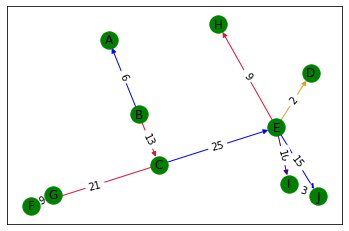

In [3]:
# Define of Graph Class
G = nx.DiGraph()

# make connections with its own relationship and weight.
# (node1, node2, weight, relationship)
connection_weight_relation_list = [('B', 'A', 6, 'Friend'), 
                                   ('B', 'C', 13, 'Coworker'), 
                                   ('C', 'F', 21, 'Coworker'), 
                                   ('C', 'E', 25, 'Friend'), 
                                   ('E', 'D', 2, 'Family'), 
                                   ('G', 'F', 9, 'Family'), 
                                   ('E', 'I', 10, 'Neighbor'), 
                                   ('E', 'J', 15, 'Friend'), 
                                   ('I', 'J', 3, 'Coworker'), 
                                   ('E', 'H', 9, 'Coworker')]
# Define Relationship color
relationship_color = {'Friend':'blue', 'Coworker':'crimson', 'Family':'goldenrod', 'Neighbor':'indigo'}


# Add edges with its relationship.
for n1, n2, w, r in connection_weight_relation_list:
    G.add_edge(n1, n2, relation=r, weight=w)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# add a weight for each edges.
weight_info = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight_info)

# coloring differently by its own relationship
for edge, relation in nx.get_edge_attributes(G, 'relation').items():
    color = relationship_color[relation] # Get relationship color
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color = color) # draw edges with given color

# add nodes with its labels
nx.draw_networkx_nodes(G,pos, node_color='green')
nx.draw_networkx_labels(G,pos)

plt.show()

As you can iamgine, the graph attribute function `.edges(data=)` will work as same with undirected network, but there is a moment when you try to get a specific edge data.<br>
Let's try one by one.

```python
# B->A
G.get_edge_data('B','A')['weight']
print(f'B->A edge data : {edge_data}')

# A->B
G.get_edge_data('A','B')['weight']
print(f'A->B edge data : {edge_data}')
```
> <b>B->A output</b><br>
> B->A edge data : {'relation': 'Friend', 'weight': 6}<br>
> <br><b>A->B output</b><br>
> TypeError: 'NoneType' object is not subscriptable

You need to be careful when call edges. Because of Direction Property, the edge `B->A` and `A->B` are different attributes each other

This would be same with Multigraph by directed or undirected.

<hr>

### Nodes Attributes In NetworkX

we could also imagine having attributes stored on the nodes. when we construct network in NetworkX, and what we can do is the following.

we first construct the graph in the usual way we have done, and then we would add the node attributes.

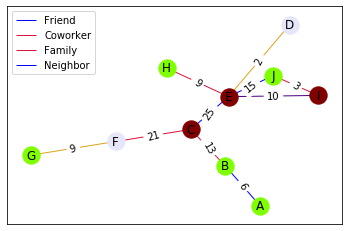

In [4]:
# Define of Graph Class
G = nx.Graph()

# make connections with its own relationship and weight.
# (node1, node2, weight, relationship)
connection_weight_relation_list = [('B', 'A', 6, 'Friend'), 
                                   ('B', 'C', 13, 'Coworker'), 
                                   ('C', 'F', 21, 'Coworker'), 
                                   ('C', 'E', 25, 'Friend'), 
                                   ('E', 'D', 2, 'Family'), 
                                   ('G', 'F', 9, 'Family'), 
                                   ('E', 'I', 10, 'Neighbor'), 
                                   ('E', 'J', 15, 'Friend'), 
                                   ('I', 'J', 3, 'Coworker'), 
                                   ('E', 'H', 9, 'Coworker')]
node_roles = [('A', 'Trader'),
              ('B', 'Trader'),
              ('C', 'Manager'),
              ('D', 'Analyst'),
              ('E', 'Manager'),
              ('F', 'Analyst'),
              ('G', 'Trader'),
              ('H', 'Trader'),
              ('I', 'Manager'),
              ('J', 'Trader'),
             ]

# Define Relationship color
relationship_color = {'Friend':'blue', 'Coworker':'crimson', 'Family':'goldenrod', 'Neighbor':'indigo'}
role_color = {'Trader' : 'chartreuse', 'Manager' : 'maroon', 'Analyst' : 'lavender'}


# Add edges with its relationship.
for n1, n2, w, r in connection_weight_relation_list:
    G.add_edge(n1, n2, relation=r, weight=w)
    
# Add nodes with its roles.
for n, role in node_roles:
    G.add_node(n, role=role)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# add a weight for each edges.
weight_info = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight_info)

# coloring differently by its own relationship
for edge, relation in nx.get_edge_attributes(G, 'relation').items():
    color = relationship_color[relation] # Get relationship color
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color = color) # draw edges with given color
    
# coloring differently by its own relationship
for node, role in nx.get_node_attributes(G, 'role').items():
    color = role_color[role] # Get Role color
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color = color) # draw nodes with role color

# annotate relationship colors
plt.legend(relationship_color)

nx.draw_networkx_labels(G,pos)
plt.show()